In [1]:
# Add libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv', dtype = {"PuaMode": object})

#train_df.head()

In [18]:
train_clean_df = train_df

In [45]:
pd.set_option('display.max_columns', None) #to show all the columns in the the head of the df 
train_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSI

In [46]:
train_df.shape


(8921483, 83)

In [47]:
train_df.describe()


,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8.889165e+06,8.921483e+06,433438.000000,8.885262e+06,8.885262e+06,8.885262e+06,8.921483e+06,8.921483e+06,8.596074e+06,6.169965e+06,8.921270e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.885439e+06,8.921483e+06,8.383724e+06,8.862589e+06,8.830133e+06,8.910645e+06,8.826005e+06,8.819250e+06,8.880177e+06,8.880170e+06,8.880140e+06,8.868467e+06,8.868481e+06,8.921483e+06,8.840950e+06,8.874349e+06,8.874497e+06,8.874497e+06,8.652728e+06,8.921483e+06,8.921483e+06,8.861399e+06,8.921483e+06,8.921483e+06,1.512724e+06,8.760960e+06,3.254158e+06,8.738226e+06,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8.850140e+06,8.618032e+06,8.618032e+06,8.921483e+06
mean,7.509962e-06,6.845332e+00,1.733378e-02,1658.355421,4.784001e+04,1.326779e+00,1.020967e+00,9.879711e-01,1.080490e+02,8.126653e+04,2.486492e+01,1.696616e+02,1.228161e+02,1.571997e+04,5.751534e+02,9.456237e-01,2.891896e-05,4.629208e-04,1.265760e+02,9.785825e-01,1.302773e+01,2.220166e+03,2.391424e+05,3.989696e+00,4.531551e+00,2.371272e+03,3.089053e+06,3.773683e+05,7.718728e-02,6.115261e+03,1.667619e+01,1.547716e+03,8.975707e+02,1.123782e+09,1.583483e+04,9.730490e+02,1.461038e+01,6.046534e+01,5.452008e-04,1.388224e-05,1.004456e-05,2.507561e-04,4.028800e+02,3.302792e+04,4.860229e-01,3.065811e-07,7.039446e-03,1.255431e-01,3.807091e-02,5.741920e-02,2.835785e-01,7.883565e+00,4.997927e-01
std,2.740421e-03,1.026055e+00,1.305118e-01,998.960373,1.403237e+04,5.229272e-01,1.675544e-01,1.090149e-01,6.304706e+01,4.892339e+04,5.605503e+00,8.931813e+01,6.932125e+01,2.190685e+03,2.480847e+02,2.267587e-01,5.377558e-03,2.151061e-02,4.267778e+01,1.447714e-01,9.867770e+03,1.315713e+03,7.194786e+04,2.082553e+00,1.286847e+00,8.406009e+02,4.451634e+09,3.258791e+05,2.668884e-01,5.115821e+03,5.892932e+00,3.683716e+02,2.146239e+02,1.887782e+09,1.961743e+03,2.931971e+03,1.020014e+01,4.499992e+01,2.334317e-02,3.725863e-03,3.169300e-03,1.583330e-02,2.216528e+02,2.120691e+04,4.998046e-01,5.536976e-04,8.360558e-02,3.313338e-01,1.913675e-01,2.326419e-01,4.507347e-01,4.550121e+00,5.000000e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.600000e+03,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,7.000000e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,7.600000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

In [48]:
train_df.columns


Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [49]:
#Create a smaller df
small_df = train_df.iloc[:1000][:]

In [50]:
random_df = train_df.sample(frac =.10) 
random_df.shape

(892148, 83)

In [51]:
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892148 entries, 7388197 to 3261094
Data columns (total 83 columns):
MachineIdentifier                                    892148 non-null object
ProductName                                          892148 non-null object
EngineVersion                                        892148 non-null object
AppVersion                                           892148 non-null object
AvSigVersion                                         892148 non-null object
IsBeta                                               892148 non-null int64
RtpStateBitfield                                     888938 non-null float64
IsSxsPassiveMode                                     892148 non-null int64
DefaultBrowsersIdentifier                            43460 non-null float64
AVProductStatesIdentifier                            888483 non-null float64
AVProductsInstalled                                  888483 non-null float64
AVProductsEnabled                            

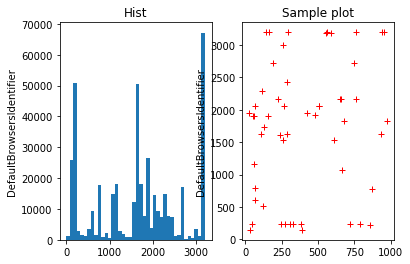

In [52]:
# Plot histograms and graphs
# DefaultBrowserIndetifier
# 
plt.subplot(1, 2, 1)
number_bins = 40
plt.title('Hist')
plt.ylabel('DefaultBrowsersIdentifier')
plt.hist(train_df.DefaultBrowsersIdentifier, bins = number_bins)

plt.subplot(1, 2, 2)
plt.title('Sample plot')
plt.ylabel('DefaultBrowsersIdentifier')
plt.plot (train_df.DefaultBrowsersIdentifier[1:1000], marker='+', linestyle = 'None', color='r', label='DefaultBrowsersIdentifier')
plt.show()

In [70]:
print(train_df.DefaultBrowsersIdentifier[100:])
print('max =', train_df.DefaultBrowsersIdentifier.max())
print('min =', train_df.DefaultBrowsersIdentifier.min())


100           NaN
101           NaN
102           NaN
103           NaN
104           NaN
105           NaN
106        1632.0
107           NaN
108           NaN
109           NaN
110           NaN
111           NaN
112           NaN
113        2290.0
114           NaN
115           NaN
116           NaN
117           NaN
118           NaN
119           NaN
120         508.0
121           NaN
122           NaN
123           NaN
124           NaN
125           NaN
126           NaN
127        1727.0
128           NaN
129           NaN
            ...  
8921453       NaN
8921454       NaN
8921455       NaN
8921456       NaN
8921457       NaN
8921458       NaN
8921459    1727.0
8921460       NaN
8921461       NaN
8921462       NaN
8921463       NaN
8921464       NaN
8921465       NaN
8921466       NaN
8921467       NaN
8921468       NaN
8921469       NaN
8921470       NaN
8921471       NaN
8921472       NaN
8921473       NaN
8921474       NaN
8921475       NaN
8921476       NaN
8921477   

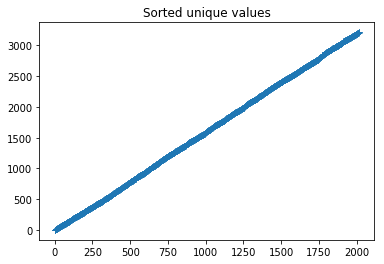

None


In [108]:
#How many 0's I have
#print(train_df[train_df['DefaultBrowsersIdentifier']==0].count())

# See unique values
uni = train_df['DefaultBrowsersIdentifier'].unique()
uni_sorted = (uni.sort())
plt.title('Sorted unique values')
plt.plot(uni, marker='+', linestyle = 'None')
plt.show()

print (uni_sorted)

# I will overlap all the nan values by 0 so I can see the
#DefaultBrowsersIdentifier_clean = train_df['DefaultBrowsersIdentifier'].fillna(0)

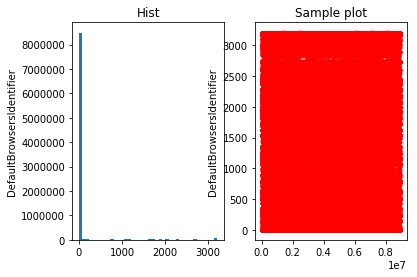

In [74]:
# 0's are too dominant to understand the rest of the values distribution 
plt.subplot(1, 2, 1)
number_bins = 40
plt.title('Hist')
plt.ylabel('DefaultBrowsersIdentifier')
plt.hist(DefaultBrowsersIdentifier_clean, bins = number_bins)

plt.subplot(1, 2, 2)
plt.title('Sample plot')
plt.ylabel('DefaultBrowsersIdentifier')
plt.plot (DefaultBrowsersIdentifier_clean, marker='.', linestyle = 'None', color='r', label='DefaultBrowsersIdentifier')
plt.show()

In [76]:
# Plotting the values without including NaN
DefaultBrowsersIdentifier_drop = train_df['DefaultBrowsersIdentifier'].dropna()


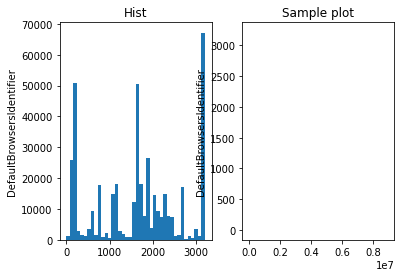

In [78]:
plt.subplot(1, 2, 1)
number_bins = 40
plt.title('Hist')
plt.ylabel('DefaultBrowsersIdentifier')
plt.hist(DefaultBrowsersIdentifier_drop, bins = number_bins)

plt.subplot(1, 2, 2)
plt.title('Sample plot')
plt.ylabel('DefaultBrowsersIdentifier')
plt.plot (DefaultBrowsersIdentifier_drop, linestyle = 'None', color='r', label='DefaultBrowsersIdentifier')
plt.show()

In [79]:
print(DefaultBrowsersIdentifier_drop[100:])
print('max =', DefaultBrowsersIdentifier_drop.max())
print('min =', DefaultBrowsersIdentifier_drop.min())

2052        239.0
2083       1536.0
2103       1160.0
2152       2168.0
2154       2847.0
2164       3176.0
2165       1632.0
2170       2170.0
2189       3195.0
2221        311.0
2271       3195.0
2289        146.0
2298       2168.0
2303       1910.0
2310        146.0
2362        239.0
2370        239.0
2409        239.0
2422        139.0
2429         10.0
2448       2273.0
2474       2064.0
2521       1632.0
2571       1632.0
2586       1160.0
2607        139.0
2610        351.0
2613       2290.0
2614       1536.0
2652        239.0
            ...  
8920899    3176.0
8920911    1910.0
8920913    1632.0
8920927    1632.0
8920958    1160.0
8920965     239.0
8920993    2064.0
8920994     239.0
8920997    1910.0
8921018    1727.0
8921025    3195.0
8921053    3176.0
8921133     221.0
8921143    3176.0
8921169    1823.0
8921181    1727.0
8921187    1160.0
8921200    1632.0
8921210    2421.0
8921214     239.0
8921234    2272.0
8921333     239.0
8921336     239.0
8921349    1632.0
8921416   

In [115]:
# Calculate the median for this column. Using drop column. 
median = np.median(DefaultBrowsersIdentifier_drop)
print (median)


1632.0


In [3]:
#Creating the new clean column
# Entry full colum
def fillcolumn(vector, value):
    clean = vector.fillna(value)
    #Print unique values
    unique = clean.unique() 
    print ('Unique values')
    print (unique)
    return clean

Values of n in bins:
(array([1.225000e+03, 2.586700e+04, 5.089300e+04, 2.786000e+03,
       1.652000e+03, 1.333000e+03, 3.519000e+03, 9.424000e+03,
       1.700000e+03, 1.765000e+04, 9.150000e+02, 2.325000e+03,
       4.740000e+02, 1.493700e+04, 1.804000e+04, 2.996000e+03,
       2.016000e+03, 8.440000e+02, 8.250000e+02, 1.218000e+04,
       8.538536e+06, 1.814400e+04, 7.844000e+03, 2.647100e+04,
       3.847000e+03, 1.456000e+04, 9.446000e+03, 7.402000e+03,
       1.480500e+04, 7.745000e+03, 7.240000e+03, 1.232000e+03,
       1.630000e+03, 1.707600e+04, 2.630000e+02, 1.262000e+03,
       6.640000e+02, 3.413000e+03, 1.138000e+03, 6.716400e+04]), array([1.0000e+00, 8.1300e+01, 1.6160e+02, 2.4190e+02, 3.2220e+02,
       4.0250e+02, 4.8280e+02, 5.6310e+02, 6.4340e+02, 7.2370e+02,
       8.0400e+02, 8.8430e+02, 9.6460e+02, 1.0449e+03, 1.1252e+03,
       1.2055e+03, 1.2858e+03, 1.3661e+03, 1.4464e+03, 1.5267e+03,
       1.6070e+03, 1.6873e+03, 1.7676e+03, 1.8479e+03, 1.9282e+03,
       2.00

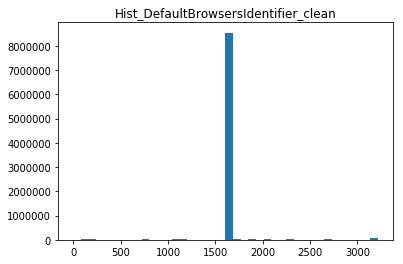

In [122]:
train_clean_df['DefaultBrowsersIdentifier'] = fillcolumn(train_df['DefaultBrowsersIdentifier'], 1632.0)
EDAcolumn(train_clean_df['DefaultBrowsersIdentifier'], 40, 'DefaultBrowsersIdentifier_clean')

In [4]:
# Drop to understand the distribution of the rest of the values to
# be able to decide what to do with Nan values. 
def dropandplot(vector, number_bins, label):
    #Print unique values
    unique = vector.unique() 
    print ('Unique values')
    print (unique)
    
    #DROP
    vector_drop = vector.dropna()
    print ('Size of the vector after dropping Nan',vector_drop.shape)
    #PLOTS
    plt.subplot(1, 2, 1)
    plt.title('Hist'+'_'+ label)
    n = plt.hist(vector, bins = number_bins)
    print('Values of n in bins:')
    print (n)

    plt.subplot(1, 2, 2)
    plt.title('Sample plot')
    plt.plot (vector_drop.sample(frac =.10) , marker='+',linestyle = 'None', color='r')
    plt.show()
    
    print('max =', vector_drop.max())
    print('min =', vector_drop.min())
    
    return vector_drop

In [30]:
def dropandplotObject(vector,label):
    
    #Print unique values
    unique = vector.unique() 
    print ('Unique values')
    print (unique)
        
    #DROP
    vector_drop = vector.dropna()
    print ('Size of the vector after dropping Nan',vector_drop.shape)
    #PLOTS
    count = vector.value_counts() 
    print('Count values')
    print (count)
    plt.title('Hist'+'_'+ label)
    vector.value_counts().plot(kind='bar')
    plt.show()
    
    print('max =', vector_drop.max())
    print('min =', vector_drop.min())
    
    #return vector_drop

In [21]:
# EDA analysis of a column 
def EDAcolumn(vector, number_bins, label):
    #PLOTS
    plt.title('Hist'+'_'+ label)
    n = plt.hist(vector, bins = number_bins)
    plt.show()
    print('Values of n in bins:')
    print (n)


In [22]:
# EDA analysis of a column 
def EDAcolumnObject(vector, label):
    #PLOTS
    count = vector.value_counts() 
    print('count after drop')
    print (count)
    plt.title('Hist'+'_'+ label)
    vector.value_counts().plot(kind='bar')
    plt.show()

Unique values
[18. nan 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
Size of the vector after dropping Nan (6169965,)
Values of n in bins:
(array([3.488000e+03, 3.310000e+02, 1.385000e+03, 2.402000e+03,
       9.800000e+01, 7.230000e+02, 0.000000e+00, 2.051900e+04,
       7.000000e+00, 0.000000e+00, 4.726000e+03, 2.420000e+02,
       1.000000e+00, 1.764175e+06, 1.087000e+03, 3.970000e+02,
       4.180000e+02, 2.000000e+01, 1.200000e+01, 1.600000e+02,
       4.196457e+06, 1.726000e+03, 6.400000e+01, 3.980000e+02,
       4.045000e+03, 2.898000e+03, 3.200000e+01, 3.909000e+03,
       1.939800e+04, 4.140000e+02, 1.648000e+03, 7.700000e+01,
       1.920000e+02, 1.500000e+02, 7.300000e+01, 1.097400e+04,
       6.423000e+04, 1.362700e+04, 4.550200e+04, 3.960000e+03]), array([ 1.   ,  2.275,  3.55 ,  4.825,  6.1  ,  7.375,  8.65 ,  9.925,
       1

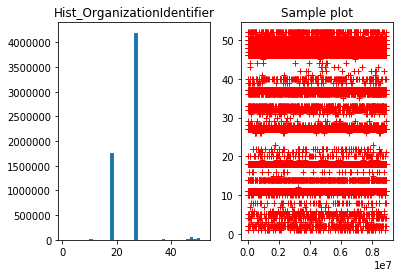

max = 52.0
min = 1.0


In [127]:
# Repeat the above with other columns that have significa ammount of Nan values. 
# Green in the word document -- report


number_bins = 40
dropandplot(train_df['OrganizationIdentifier'], number_bins, 'OrganizationIdentifier')


Unique values
[18. 24. 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
Values of n in bins:
(array([3.488000e+03, 3.310000e+02, 1.385000e+03, 2.402000e+03,
       9.800000e+01, 7.230000e+02, 0.000000e+00, 2.051900e+04,
       7.000000e+00, 0.000000e+00, 4.726000e+03, 2.420000e+02,
       1.000000e+00, 1.764175e+06, 1.087000e+03, 3.970000e+02,
       4.180000e+02, 2.000000e+01, 2.751530e+06, 1.600000e+02,
       4.196457e+06, 1.726000e+03, 6.400000e+01, 3.980000e+02,
       4.045000e+03, 2.898000e+03, 3.200000e+01, 3.909000e+03,
       1.939800e+04, 4.140000e+02, 1.648000e+03, 7.700000e+01,
       1.920000e+02, 1.500000e+02, 7.300000e+01, 1.097400e+04,
       6.423000e+04, 1.362700e+04, 4.550200e+04, 3.960000e+03]), array([ 1.   ,  2.275,  3.55 ,  4.825,  6.1  ,  7.375,  8.65 ,  9.925,
       11.2  , 12.475, 13.75 , 15.025, 16.3  , 17.575, 18

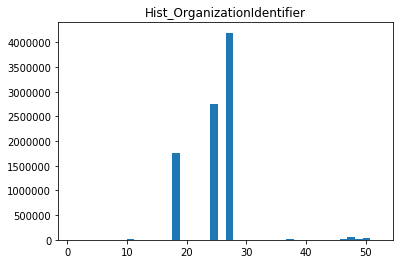

In [130]:
# Clean and safe OrganizationIdentifier
train_clean_df['OrganizationIdentifier'] = fillcolumn(train_df['OrganizationIdentifier'], 24)
EDAcolumn(train_clean_df['OrganizationIdentifier'], 40, 'OrganizationIdentifier')

Unique values
[nan 'on' 'audit']
Size of the vector after dropping Nan (2309,)
Count values
on       2307
audit       2
Name: PuaMode, dtype: int64
max = on
min = audit


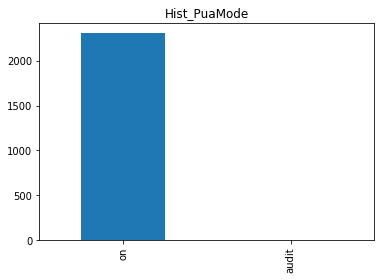

In [30]:
# The rest of Green 
# PuaMode

dropandplotObject(train_df['PuaMode'],'PuaMode')

Unique values
['on' 'audit']
count after drop
on       8921481
audit          2
Name: PuaMode, dtype: int64


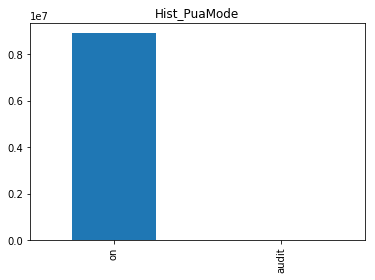

In [31]:
# Clean and safe PuaMode
train_clean_df['PuaMode'] = fillcolumn(train_df['PuaMode'], 'on')
EDAcolumnObject(train_clean_df['PuaMode'],'PuaMode')

Unique values
[nan 'RequireAdmin' 'ExistsNotSet' 'Off' 'Warn' 'Prompt' 'Block' 'off'
 'On' 'on' '&#x01;' '&#x02;' 'OFF' 'Promt' '0' 'requireadmin' 'Enabled'
 'prompt' 'warn' '00000000' 'requireAdmin' '&#x03;']
Size of the vector after dropping Nan (5744472,)
Count values
RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
Enabled               1
&#x03;                1
00000000              1
requireAdmin          1
prompt                1
warn                  1
Name: SmartScreen, dtype: int64
max = warn
min = &#x01;


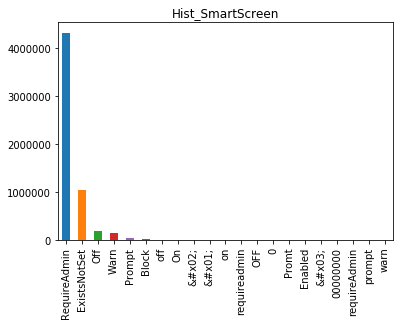

In [34]:
# The rest of Green 
# SmartScreen

dropandplotObject(train_df['SmartScreen'],'SmartScreen')

In [35]:
# Collapse the label that are the same but spelled differently. We use the standard label Title. 
train_clean_df['SmartScreen'] = train_df['SmartScreen'].str.title()

Unique values
[nan 'Requireadmin' 'Existsnotset' 'Off' 'Warn' 'Prompt' 'Block' 'On'
 '&#X01;' '&#X02;' 'Promt' '0' 'Enabled' '00000000' '&#X03;']
Size of the vector after dropping Nan (5744472,)
Count values
Requireadmin    4316194
Existsnotset    1046183
Off              187907
Warn             135484
Prompt            34534
Block             22533
On                  878
&#X02;              416
&#X01;              335
0                     3
Promt                 2
Enabled               1
00000000              1
&#X03;                1
Name: SmartScreen, dtype: int64
max = Warn
min = &#X01;


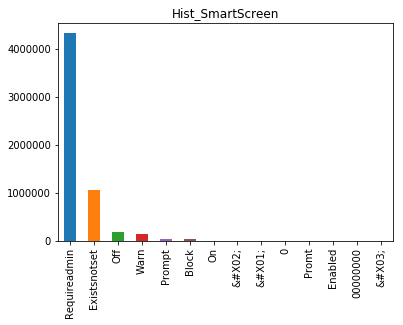

In [36]:
# Consolidating SmartScreen
dropandplotObject(train_df['SmartScreen'],'SmartScreen')

In [37]:
#Fill the nand values with 
train_clean_df['SmartScreen'] = fillcolumn(train_df['SmartScreen'], 'screen_na')

Unique values
['screen_na' 'Requireadmin' 'Existsnotset' 'Off' 'Warn' 'Prompt' 'Block'
 'On' '&#X01;' '&#X02;' 'Promt' '0' 'Enabled' '00000000' '&#X03;']


count after drop
Requireadmin    4316194
screen_na       3177011
Existsnotset    1046183
Off              187907
Warn             135484
Prompt            34534
Block             22533
On                  878
&#X02;              416
&#X01;              335
0                     3
Promt                 2
Enabled               1
00000000              1
&#X03;                1
Name: SmartScreen, dtype: int64


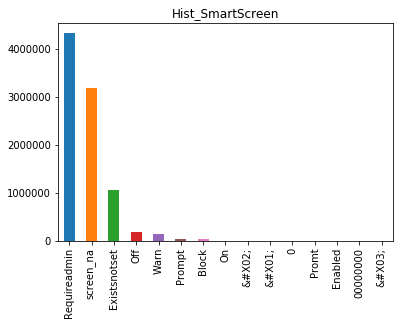

In [39]:
EDAcolumnObject(train_clean_df['SmartScreen'], 'SmartScreen')

Unique values
[nan 'mid' 'low' 'high']
Size of the vector after dropping Nan (36631,)
Count values
mid     20914
low      9621
high     6096
Name: Census_ProcessorClass, dtype: int64
max = mid
min = high


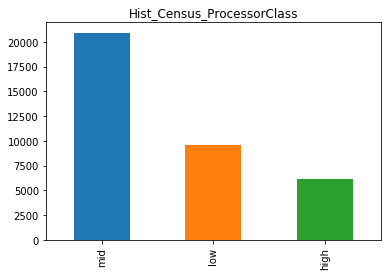

In [32]:
# Census_ProcessorClass

dropandplotObject(train_df['Census_ProcessorClass'],'Census_ProcessorClass')

Unique values
['processorclass_na' 'mid' 'low' 'high']
count after drop
processorclass_na    8884852
mid                    20914
low                     9621
high                    6096
Name: Census_ProcessorClass, dtype: int64


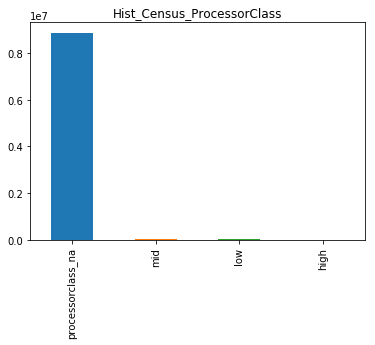

In [40]:
# Clean and save Census_ProcessorClass

#Fill the nand values with 
train_clean_df['Census_ProcessorClass'] = fillcolumn(train_df['Census_ProcessorClass'], 'processorclass_na')
EDAcolumnObject(train_clean_df['Census_ProcessorClass'],'Census_ProcessorClass')

Unique values
[nan 'lion' 'li-i' '#' 'lip' 'liio' 'vbox' 'li p' 'real' 'unkn' 'pbac'
 'li' 'bq20' 'nimh' '\x04lio' 'lgi0' 'lhp0' 'ithi' 'batt' 'lipp' 'lipo'
 '4cel' 'ram' 'lit' 'a140' 'bad' 'asmb' 'virt' 'ca48' '4ion' 'd' 'a132'
 'ÿÿÿÿ' 'cl53' 'lio' 'li-l' '÷ÿóö' 'í\x03-i' '0x0b' 'lgs0' '3ion' 'ots0'
 'lai0' 'lilo' 'pa50' 'h4°s' '5nm1' 'li-p' 'lhpo' '0ts0' 'pad0' 'sail'
 'p-sn' 'icp3' 'a130' '2337' '\x1f˙˙˙' 'lgl0' 'l\x15' '@i\uf8f5\uf8f5'
 'li\x90o' '4lio' 'lp' 'li?' '\x04ion' 'pbso' 'a138' 'li-h' '6ion' '3500'
 'h00j' 'li\x10' 'sams' '\x03ip' '8' '#TAB#' 'l\x06&#TAB#' 'liÿÿ' 'lÿÿÿ']
Size of the vector after dropping Nan (2583054,)
Count values
lion        2028256
li-i         245617
#            183998
lip           62099
liio          32635
li p           8383
li             6708
nimh           4614
real           2744
bq20           2302
pbac           2274
vbox           1454
unkn            533
lgi0            399
lipo            198
lhp0            182
4cel            170
lipp  

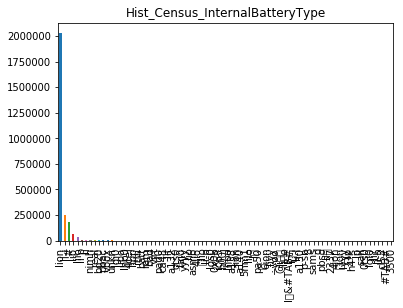

In [33]:
# Census_InternalBatteryType

dropandplotObject(train_df['Census_InternalBatteryType'],'Census_InternalBatteryType')


Unique values
[nan  0.  1.]
Size of the vector after dropping Nan (1512724,)
Values of n in bins:
(array([1.512703e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 2.100000e+01]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.8

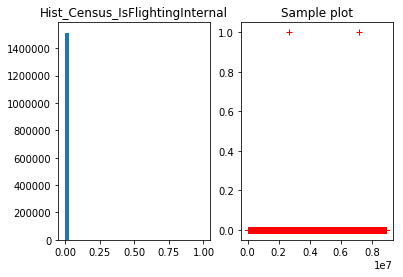

max = 1.0
min = 0.0


In [131]:
#Census_IsFlightingInternal

dropandplot(train_df['Census_IsFlightingInternal'], number_bins, 'Census_IsFlightingInternal')



Unique values
[0. 1.]
Values of n in bins:
(array([8.921462e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 2.100000e+01]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ]), 

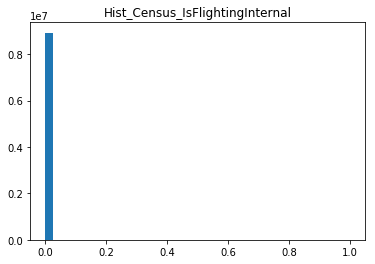

In [132]:
# Clean and safe OrganizationIdentifier
train_clean_df['Census_IsFlightingInternal'] = fillcolumn(train_df['Census_IsFlightingInternal'], 0)
EDAcolumn(train_clean_df['Census_IsFlightingInternal'], 40, 'Census_IsFlightingInternal')

In [134]:
# Transform to bool
train_clean_df['Census_IsFlightingInternal'] = train_clean_df['Census_IsFlightingInternal'].astype('bool')
unique = train_clean_df['Census_IsFlightingInternal'].unique() 
print ('Unique values')
print (unique)




Unique values
[False  True]


Unique values
[nan  0.  1.]
Size of the vector after dropping Nan (3254158,)
Values of n in bins:
(array([3.253342e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 8.160000e+02]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.8

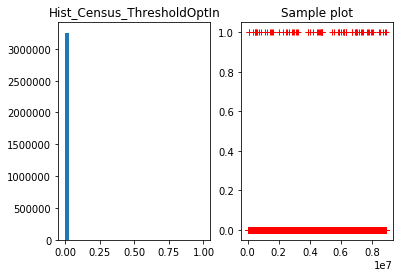

max = 1.0
min = 0.0
Unique values
[0. 1.]
Values of n in bins:
(array([8.920667e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 8.160000e+02]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.9

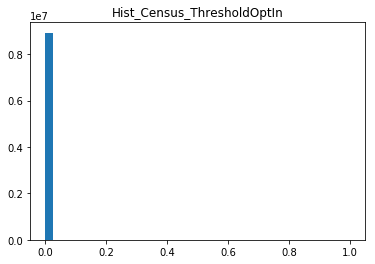

In [136]:
#Census_ThresholdOptIn

dropandplot(train_df['Census_ThresholdOptIn'], number_bins, 'Census_ThresholdOptIn')
train_clean_df['Census_ThresholdOptIn'] = fillcolumn(train_df['Census_ThresholdOptIn'], 0)
EDAcolumn(train_clean_df['Census_ThresholdOptIn'], 40, 'Census_ThresholdOptIn')

In [ ]:
# Transform to bool
train_clean_df['Census_ThresholdOptIn'] = train_clean_df['Census_ThresholdOptIn'].astype('bool')
unique = train_clean_df['Census_ThresholdOptIn'].unique() 
print ('Unique values')
print (unique)

Unique values
[nan  0.  1.]
Size of the vector after dropping Nan (3261780,)
Values of n in bins:
(array([3.261779e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.8

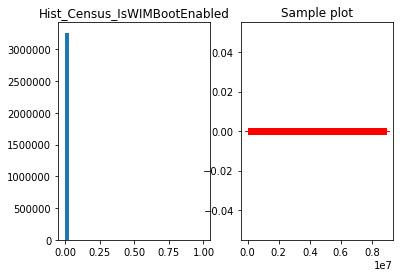

max = 1.0
min = 0.0
Unique values
[0. 1.]
Values of n in bins:
(array([8.921482e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.9

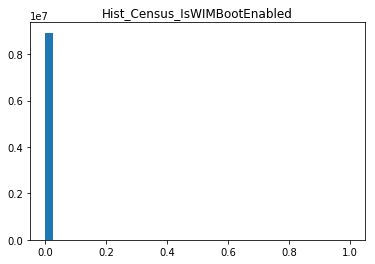

In [138]:
#Census_IsWIMBootEnabled

dropandplot(train_df['Census_IsWIMBootEnabled'], number_bins, 'Census_IsWIMBootEnabled')
train_clean_df['Census_IsWIMBootEnabled'] = fillcolumn(train_df['Census_IsWIMBootEnabled'], 0)
EDAcolumn(train_clean_df['Census_IsWIMBootEnabled'], 40, 'Census_IsWIMBootEnabled')

In [ ]:
# Transform to bool
train_clean_df['Census_IsWIMBootEnabled'] = train_clean_df['Census_IsWIMBootEnabled'].astype('bool')
unique = train_clean_df['Census_IsWIMBootEnabled'].unique() 
print ('Unique values')
print (unique)

Unique values
[128035.   1482. 153579. ...  47472. 147921.  97837.]
Size of the vector after dropping Nan (8596074,)
Values of n in bins:
(array([310783., 277421., 271849., 298485., 232995., 241355., 204028.,
       169493., 221865., 174038.,  89929.,  96951., 113589., 281069.,
       179716., 321554., 277982., 282003., 140870., 226112., 292387.,
       231886., 223861., 225940., 134424., 196865., 198000., 229553.,
       234454., 130165., 185728., 292951., 214432., 158649., 410192.,
       197972., 152132., 155174., 101902., 217320.]), array([5.00000000e+00, 4.20392500e+03, 8.40285000e+03, 1.26017750e+04,
       1.68007000e+04, 2.09996250e+04, 2.51985500e+04, 2.93974750e+04,
       3.35964000e+04, 3.77953250e+04, 4.19942500e+04, 4.61931750e+04,
       5.03921000e+04, 5.45910250e+04, 5.87899500e+04, 6.29888750e+04,
       6.71878000e+04, 7.13867250e+04, 7.55856500e+04, 7.97845750e+04,
       8.39835000e+04, 8.81824250e+04, 9.23813500e+04, 9.65802750e+04,
       1.00779200e+05, 1.049781

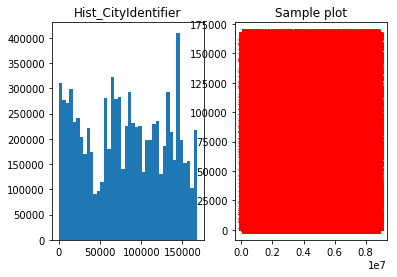

max = 167962.0
min = 5.0


In [46]:
## Start working with the VIOLET columns
# CityIdentifier
number_bims = 40
vectordrop = dropandplot(train_df['CityIdentifier'], number_bins, 'CityIdentifier')
train_df['CityIdentifier']

In [50]:
median = np.median(train_df['CityIdentifier'].dropna())
print (median)

#median = np.median(train_df['CityIdentifier'])
#print (median)




82373.0


Unique values
[128035.   1482. 153579. ...  47472. 147921.  97837.]
Values of n in bins:
(array([310783., 277421., 271849., 298485., 232995., 241355., 204028.,
       169493., 221865., 174038.,  89929.,  96951., 113589., 281069.,
       179716., 321554., 277982., 282003., 140870., 551521., 292387.,
       231886., 223861., 225940., 134424., 196865., 198000., 229553.,
       234454., 130165., 185728., 292951., 214432., 158649., 410192.,
       197972., 152132., 155174., 101902., 217320.]), array([5.00000000e+00, 4.20392500e+03, 8.40285000e+03, 1.26017750e+04,
       1.68007000e+04, 2.09996250e+04, 2.51985500e+04, 2.93974750e+04,
       3.35964000e+04, 3.77953250e+04, 4.19942500e+04, 4.61931750e+04,
       5.03921000e+04, 5.45910250e+04, 5.87899500e+04, 6.29888750e+04,
       6.71878000e+04, 7.13867250e+04, 7.55856500e+04, 7.97845750e+04,
       8.39835000e+04, 8.81824250e+04, 9.23813500e+04, 9.65802750e+04,
       1.00779200e+05, 1.04978125e+05, 1.09177050e+05, 1.13375975e+05,
       1.

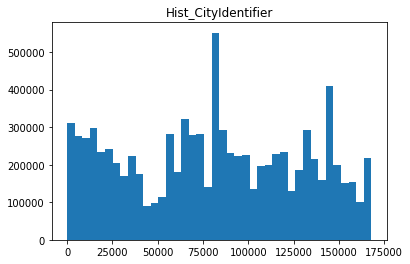

In [53]:
# Clean and safe CityIdentifier
train_clean_df['CityIdentifier'] = fillcolumn(train_df['CityIdentifier'], median)
EDAcolumn(train_clean_df['CityIdentifier'], 40, 'CityIdentifier')

Unique values
[ 0. nan  1.]
Size of the vector after dropping Nan (8383724,)
Values of n in bins:
(array([8.379843e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 3.881000e+03]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.8

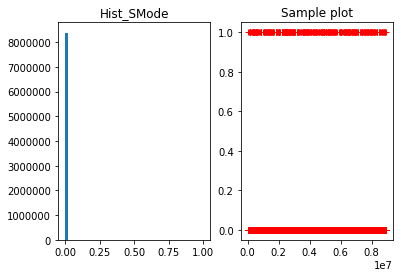

max = 1.0
min = 0.0


In [56]:
#SMode

number_bims = 40
dropandplot(train_df['SMode'], number_bins, 'SMode')

Unique values
[0. 1.]
Values of n in bins:
(array([8.917602e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 3.881000e+03]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ]), 

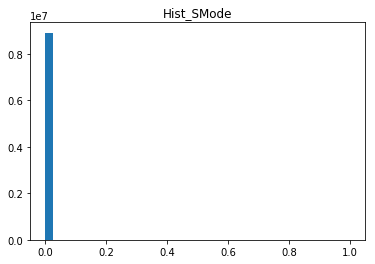

In [57]:
# Binary data. Adding nan values into the most relevant label (0)
# Clean and safe CityIdentifier
train_clean_df['SMode'] = fillcolumn(train_df['SMode'], 0)
EDAcolumn(train_clean_df['SMode'], 40, 'SMode')

In [58]:
# Change the the column for Bool
# Transform to bool
train_clean_df['SMode'] = train_clean_df['SMode'].astype('bool')
unique = train_clean_df['SMode'].unique() 
print ('Unique values')
print (unique)

Unique values
[False  True]


Unique values
[4.2949673e+09 1.0000000e+00 0.0000000e+00 ... 2.7736000e+04 2.6424000e+04
 1.6807000e+04]
Size of the vector after dropping Nan (8652728,)
Values of n in bins:
(array([6388735.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0., 2263993.]), array([0.00000000e+00, 1.07374182e+08, 2.14748365e+08, 3.22122547e+08,
       4.29496730e+08, 5.36870912e+08, 6.44245094e+08, 7.51619277e+08,
       8.58993459e+08, 9.66367641e+08, 1.07374182e+09, 1.18111601e+09,
       1.28849019e+09, 1.39586437e+09, 1.50323855e+09, 1.61061274e+09,
       1.71798692e+09, 1.82536110e+09, 1.93273528e+09, 2.04010947e+09,
       2.14748365e

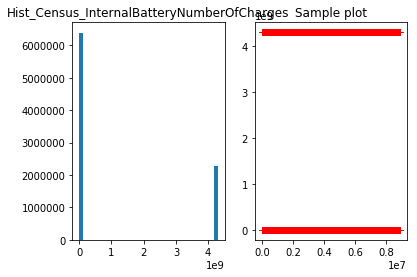

max = 4294967295.0
min = 0.0


In [64]:
#Census_InternalBatteryNumberOfCharges

number_bims = 40
dropandplot(train_df['Census_InternalBatteryNumberOfCharges'], number_bins, 'Census_InternalBatteryNumberOfCharges')

In [66]:
median = np.median(train_df['Census_InternalBatteryNumberOfCharges'].dropna())
print (median)

0.0


Unique values
[4.2949673e+09 1.0000000e+00 0.0000000e+00 ... 2.7736000e+04 2.6424000e+04
 1.6807000e+04]
Values of n in bins:
(array([6657490.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0., 2263993.]), array([0.00000000e+00, 1.07374182e+08, 2.14748365e+08, 3.22122547e+08,
       4.29496730e+08, 5.36870912e+08, 6.44245094e+08, 7.51619277e+08,
       8.58993459e+08, 9.66367641e+08, 1.07374182e+09, 1.18111601e+09,
       1.28849019e+09, 1.39586437e+09, 1.50323855e+09, 1.61061274e+09,
       1.71798692e+09, 1.82536110e+09, 1.93273528e+09, 2.04010947e+09,
       2.14748365e+09, 2.25485783e+09, 2.36223201e+09, 2.46960619e+

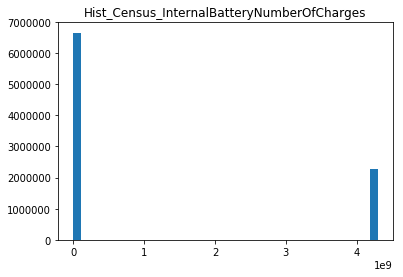

In [67]:
# Clean and save
train_clean_df['Census_InternalBatteryNumberOfCharges'] = fillcolumn(train_df['Census_InternalBatteryNumberOfCharges'], median)
EDAcolumn(train_clean_df['Census_InternalBatteryNumberOfCharges'], 40, 'Census_InternalBatteryNumberOfCharges')

Unique values
[ 0.  1. nan]
Size of the vector after dropping Nan (8618032,)
Values of n in bins:
(array([6174143.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0., 2443889.]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ]), <a list of 40 Patch objects>)


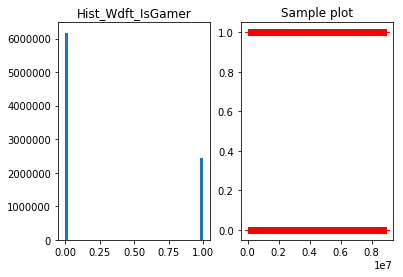

max = 1.0
min = 0.0


In [65]:
# Wdft_IsGamer
number_bims = 40
dropandplot(train_df['Wdft_IsGamer'], number_bins, 'Wdft_IsGamer')

In [68]:
median = np.median(train_df['Wdft_IsGamer'].dropna())
print (median)

0.0


Unique values
[0. 1.]
Values of n in bins:
(array([6477594.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0., 2443889.]), array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ]), <a list of 40 Patch objects>)


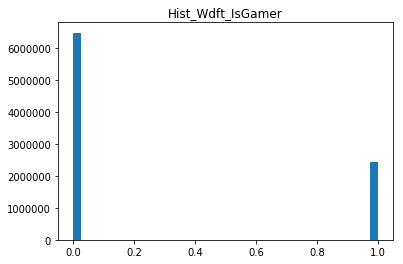

In [69]:
# Clean and save
train_clean_df['Wdft_IsGamer'] = fillcolumn(train_df['Wdft_IsGamer'], 0)
EDAcolumn(train_clean_df['Wdft_IsGamer'], 40, 'Wdft_IsGamer')

In [70]:
# Change the the column for Bool
# Transform to bool
train_clean_df['Wdft_IsGamer'] = train_clean_df['Wdft_IsGamer'].astype('bool')
unique = train_clean_df['Wdft_IsGamer'].unique() 
print ('Unique values')
print (unique)

Unique values
[False  True]


Unique values
[10.  8.  3.  1. 15.  7. 11.  2. 12.  4. 13. nan  6.  9.  5. 14.]
Size of the vector after dropping Nan (8618032,)
Values of n in bins:
(array([1232258.,       0.,   79385.,       0.,       0., 1295892.,
             0.,       0.,  135567.,       0.,       0.,  205372.,
             0.,       0.,  158163.,       0.,       0.,  597297.,
             0.,       0.,  276029.,       0.,   79882.,       0.,
             0., 1800105.,       0.,       0., 1347828.,       0.,
             0.,  163711.,       0.,       0.,  225130.,       0.,
             0.,    3822.,       0., 1017591.]), array([ 1.  ,  1.35,  1.7 ,  2.05,  2.4 ,  2.75,  3.1 ,  3.45,  3.8 ,
        4.15,  4.5 ,  4.85,  5.2 ,  5.55,  5.9 ,  6.25,  6.6 ,  6.95,
        7.3 ,  7.65,  8.  ,  8.35,  8.7 ,  9.05,  9.4 ,  9.75, 10.1 ,
       10.45, 10.8 , 11.15, 11.5 , 11.85, 12.2 , 12.55, 12.9 , 13.25,
       13.6 , 13.95, 14.3 , 14.65, 15.  ]), <a list of 40 Patch objects>)


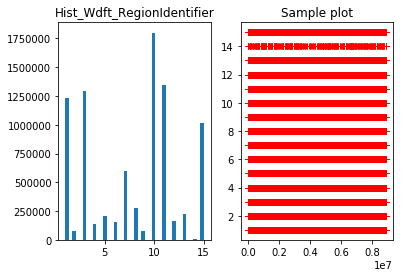

max = 15.0
min = 1.0


In [61]:
#Wdft_RegionIdentifier
number_bims = 40
dropandplot(train_df['Wdft_RegionIdentifier'], number_bins, 'Wdft_RegionIdentifier')

In [62]:
median = np.median(train_df['Wdft_RegionIdentifier'].dropna())
print (median)

10.0


Unique values
[10.  8.  3.  1. 15.  7. 11.  2. 12.  4. 13.  6.  9.  5. 14.]
Values of n in bins:
(array([1232258.,       0.,   79385.,       0.,       0., 1295892.,
             0.,       0.,  135567.,       0.,       0.,  205372.,
             0.,       0.,  158163.,       0.,       0.,  597297.,
             0.,       0.,  276029.,       0.,   79882.,       0.,
             0., 2103556.,       0.,       0., 1347828.,       0.,
             0.,  163711.,       0.,       0.,  225130.,       0.,
             0.,    3822.,       0., 1017591.]), array([ 1.  ,  1.35,  1.7 ,  2.05,  2.4 ,  2.75,  3.1 ,  3.45,  3.8 ,
        4.15,  4.5 ,  4.85,  5.2 ,  5.55,  5.9 ,  6.25,  6.6 ,  6.95,
        7.3 ,  7.65,  8.  ,  8.35,  8.7 ,  9.05,  9.4 ,  9.75, 10.1 ,
       10.45, 10.8 , 11.15, 11.5 , 11.85, 12.2 , 12.55, 12.9 , 13.25,
       13.6 , 13.95, 14.3 , 14.65, 15.  ]), <a list of 40 Patch objects>)


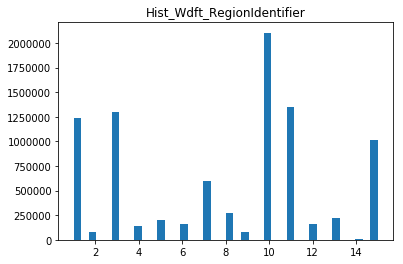

In [63]:
# Clean and save
train_clean_df['Wdft_RegionIdentifier'] = fillcolumn(train_df['Wdft_RegionIdentifier'], median)
EDAcolumn(train_clean_df['Wdft_RegionIdentifier'], 40, 'Wdft_RegionIdentifier')

Unique values
[ 7.  0. nan  3.  5.  8.  1. 35.]
Size of the vector after dropping Nan (8889165,)
Values of n in bins:
(array([1.923260e+05, 0.000000e+00, 3.029000e+03, 0.000000e+00,
       2.032800e+04, 0.000000e+00, 8.673461e+06, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.100000e+01]), array([ 0.        ,  1.16666667,  2.33333333,  3.5       ,  4.66666667,
        5.83333333,  7.        ,  8.16666667,  9.33333333, 10.5       ,
       11.66666667, 12.83333333, 14.        , 15.16666667, 16.33333333,
       17.5       , 18.66666667, 19.83333333, 21.        , 22.16666667,
       23.33333333, 24.5       , 25.66666667, 26.83333333, 28.        ,
       29.16666667, 30.33333333, 31.5      

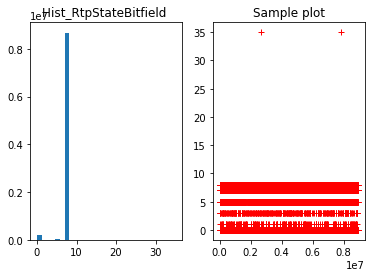

max = 35.0
min = 0.0
Unique values
[53447. 43927. 46413. ... 16684. 60602. 31745.]
Size of the vector after dropping Nan (8885262,)
Values of n in bins:
(array([   8751.,   68751.,   75099.,  508377.,   48011.,   41146.,
         12281.,   15562.,    8235.,   80327.,  145597.,   13565.,
         82525.,   17862.,   13044.,   11326.,   18679.,  193805.,
        181721.,  257147.,  390823.,  147678., 5969568.,   36607.,
         43815.,   61447.,  327769.,   38717.,   18861.,   48166.]), array([3.00000000e+00, 2.35313333e+03, 4.70326667e+03, 7.05340000e+03,
       9.40353333e+03, 1.17536667e+04, 1.41038000e+04, 1.64539333e+04,
       1.88040667e+04, 2.11542000e+04, 2.35043333e+04, 2.58544667e+04,
       2.82046000e+04, 3.05547333e+04, 3.29048667e+04, 3.52550000e+04,
       3.76051333e+04, 3.99552667e+04, 4.23054000e+04, 4.46555333e+04,
       4.70056667e+04, 4.93558000e+04, 5.17059333e+04, 5.40560667e+04,
       5.64062000e+04, 5.87563333e+04, 6.11064667e+04, 6.34566000e+04,
       6.580

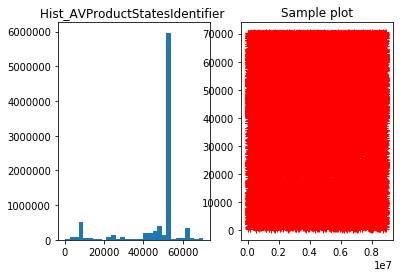

max = 70507.0
min = 3.0
Unique values
[ 1.  2.  3.  5. nan  4.  6.  7.  0.]
Size of the vector after dropping Nan (8885262,)
Values of n in bins:
(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       6.208893e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.459008e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.081030e+05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 8.757000e+03, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 4.710000e+02, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.800000e+01, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00]), array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
       1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ,
       2.33333333, 2.56666667, 2.8       , 3.03333333, 3.26666667,
       3.5       , 3.73333333, 3.96666667, 4.2       , 4.43333333,
       4.66666667, 4.9       , 5.13333333, 5.36666667, 5.6       ,
       5.83333333, 6.06666667, 6.3      

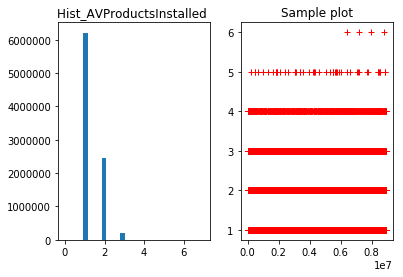

max = 7.0
min = 0.0
Unique values
[ 1.  2.  0.  4. nan  3.  5.]
Size of the vector after dropping Nan (8885262,)
Values of n in bins:
(array([2.595800e+04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 8.654101e+06, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.986520e+05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 6.075000e+03, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       4.530000e+02, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.300000e+01]), array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
       1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
       2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
       3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
       4.16666667, 4.33333333, 4.5       , 4.6666666

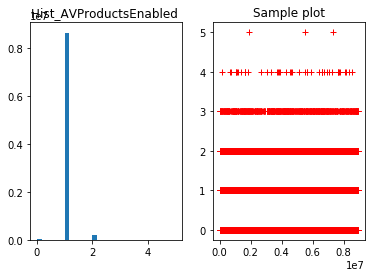

max = 5.0
min = 0.0
Unique values
[ 1.  0. nan]
Size of the vector after dropping Nan (8885439,)
Values of n in bins:
(array([ 483157.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0., 8402282.]), array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ]), <a list of 30 Patch objects>)


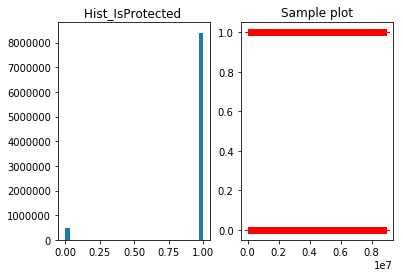

max = 1.0
min = 0.0
Unique values
[137.  94.  nan 290. 117. 111. 333.  65. 108.  82. 103.  98. 323.  78.
 105.  84. 135.  41.  76.  53. 107.  74. 302.  96.  68. 114. 311.  51.
  71.  81. 335.  42.  46. 308. 334.  44.  90. 325.  88. 295.  92. 185.
  87.  85. 327.  73.  86. 163.  91. 309. 337. 336. 317. 180. 190. 324.
  50.  72. 321.  48.  64. 196. 331.  63.  45.  49. 318. 312. 326. 174.
 176. 305. 287. 315. 186. 313. 194.  77. 169. 181. 332. 288. 153. 199.
  58.  39. 205. 328. 300. 347. 307. 102. 152. 275. 303. 319. 322. 384.
 294. 178. 154. 182. 158. 187.  56. 284.  47.  52. 201. 306.  62. 330.
 388. 282. 316. 329. 200.  59. 304.  61.  66. 162. 408. 297.  57. 285.
 156. 203.  60. 364. 383.  79. 280. 299. 166. 283. 314. 348. 151. 398.
 146. 218. 429. 140. 210. 145. 143. 289. 173.   1. 397. 220. 224. 296.
   8. 320. 136. 395. 349. 171.  54. 292. 147.  75. 391. 410. 366. 286.
 338. 298. 293. 373.  17.  21. 168. 362.  34. 195. 202. 212. 423. 379.
 412. 222.  15. 142. 400. 418.   9. 291. 27

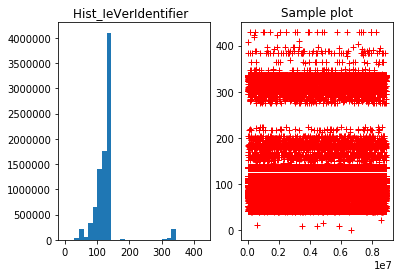

max = 429.0
min = 1.0
Unique values
[ 1.  0. nan]
Size of the vector after dropping Nan (8830133,)
Values of n in bins:
(array([ 189119.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0., 8641014.]), array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ]), <a list of 30 Patch objects>)


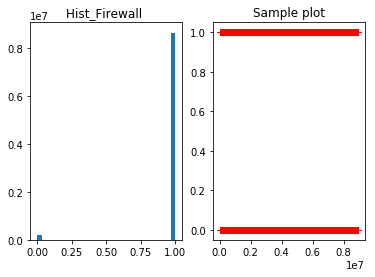

max = 1.0
min = 0.0
Unique values
[1.0000000e+00 0.0000000e+00           nan 4.8000000e+01 3.0000000e+00
 2.0000000e+00 6.3570620e+06 4.9000000e+01 1.6777216e+07 5.0000000e+00
 2.5500000e+02 7.7988840e+06]
Size of the vector after dropping Nan (8910645,)
Values of n in bins:
(array([8.91063e+06, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.30000e+01, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]), array([       0.        ,   559240.53333333,  1118481.06666667,
        1677721.6       ,  2236962.13333333,  2796202.66666667,
        3355443.2       ,  3914683.73333333,  4473924.26666667,
        5033164.8       ,  5592405.33333333,  6151645.86666667,
        6710886.4       ,  727012

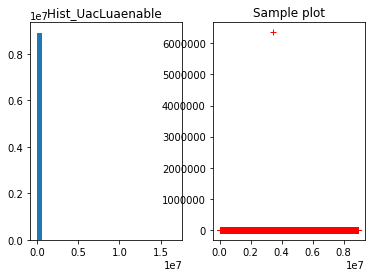

max = 16777216.0
min = 0.0
Unique values
[2668. 4909. 1443. ... 5962. 5624. 4792.]
Size of the vector after dropping Nan (8826005,)
Values of n in bins:
(array([1.688000e+03, 9.034000e+03, 1.916918e+06, 1.063830e+05,
       3.684400e+04, 1.360000e+04, 1.881300e+04, 9.948900e+05,
       6.028800e+04, 3.149120e+05, 2.013836e+06, 5.286500e+04,
       1.424600e+04, 1.335156e+06, 1.841660e+05, 2.345820e+05,
       4.005700e+04, 9.910000e+03, 1.401930e+05, 3.043400e+04,
       2.096980e+05, 1.491460e+05, 3.255600e+05, 5.071330e+05,
       4.087800e+04, 1.326900e+04, 8.695000e+03, 1.442300e+04,
       2.671000e+04, 1.678000e+03]), array([1.0000e+00, 2.0580e+02, 4.1060e+02, 6.1540e+02, 8.2020e+02,
       1.0250e+03, 1.2298e+03, 1.4346e+03, 1.6394e+03, 1.8442e+03,
       2.0490e+03, 2.2538e+03, 2.4586e+03, 2.6634e+03, 2.8682e+03,
       3.0730e+03, 3.2778e+03, 3.4826e+03, 3.6874e+03, 3.8922e+03,
       4.0970e+03, 4.3018e+03, 4.5066e+03, 4.7114e+03, 4.9162e+03,
       5.1210e+03, 5.3258e+03, 5.

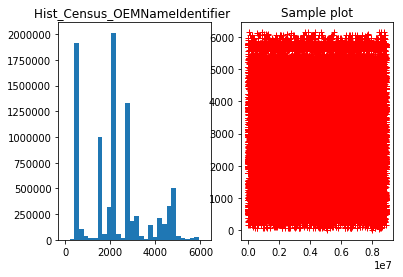

max = 6145.0
min = 1.0
Unique values
[  9124.  91656. 317701. ... 145148. 103309. 247716.]
Size of the vector after dropping Nan (8819250,)
Values of n in bins:
(array([  49441.,   24545.,   95501.,  197154.,   16907.,   21055.,
         24038.,   17919.,   37424.,   30411.,   85645.,   48990.,
         26185.,   55703.,  716249.,   63665.,  944839.,  253465.,
         77602.,  614740.,  333997., 1122347., 1122749.,  283100.,
         44912.,  215132.,  211358., 1115392.,  889063.,   79722.]), array([1.00000000e+00, 1.15175667e+04, 2.30341333e+04, 3.45507000e+04,
       4.60672667e+04, 5.75838333e+04, 6.91004000e+04, 8.06169667e+04,
       9.21335333e+04, 1.03650100e+05, 1.15166667e+05, 1.26683233e+05,
       1.38199800e+05, 1.49716367e+05, 1.61232933e+05, 1.72749500e+05,
       1.84266067e+05, 1.95782633e+05, 2.07299200e+05, 2.18815767e+05,
       2.30332333e+05, 2.41848900e+05, 2.53365467e+05, 2.64882033e+05,
       2.76398600e+05, 2.87915167e+05, 2.99431733e+05, 3.10948300e+05,
    

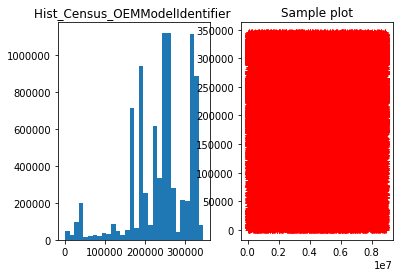

max = 345498.0
min = 1.0
Unique values
[  4.   2.   8.  12.   1.   6.  nan  16.   3.  20.  32.  24.  40.   5.
  10.  80.  56.  48.  36.  72.  64.  28.  88.   7.  14.  96. 112.  44.
  15.  50.  11.  30. 128.   9.  46.  22.  54. 144.  18. 120.  52.  26.
 192.  25. 104.  13.]
Size of the vector after dropping Nan (8880177,)
Values of n in bins:
(array([7.89635e+06, 9.57816e+05, 2.03610e+04, 1.85400e+03, 2.41700e+03,
       2.87000e+02, 5.22000e+02, 2.39000e+02, 1.36000e+02, 9.30000e+01,
       0.00000e+00, 3.90000e+01, 2.00000e+01, 2.30000e+01, 6.00000e+00,
       0.00000e+00, 2.00000e+00, 6.00000e+00, 1.00000e+00, 3.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]), array([  1.        ,   7.36666667,  13.73333333,  20.1       ,
        26.46666667,  32.83333333,  39.2       ,  45.56666667,
        51.93333333,  58.3       ,  64.66666667,  71.03333333,
        77.4       ,  83.7666666

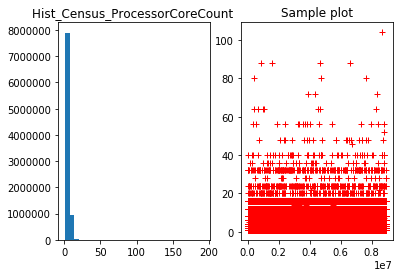

max = 192.0
min = 1.0
Unique values
[ 5.  1. 10. nan  3.  4.  7.  9.]
Size of the vector after dropping Nan (8880170,)
Values of n in bins:
(array([1.040292e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 2.180000e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 7.839318e+06, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 3.390000e+02]), array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
        4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
        7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]), <a list of 30 Patch objects>)


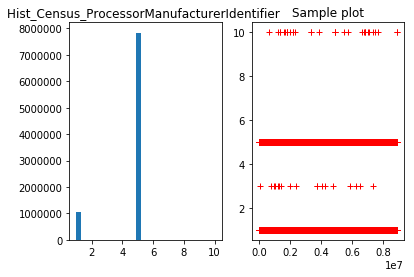

max = 10.0
min = 1.0
Unique values
[2341. 2405. 1972. ... 1728.  277. 4265.]
Size of the vector after dropping Nan (8880140,)
Values of n in bins:
(array([1.593400e+05, 2.699670e+05, 9.913900e+04, 4.392000e+04,
       2.680730e+05, 6.648000e+04, 6.227000e+03, 3.642200e+04,
       6.629500e+04, 1.865600e+04, 2.813100e+04, 2.112000e+03,
       4.630540e+05, 9.782240e+05, 1.891910e+05, 1.265534e+06,
       8.750040e+05, 9.983440e+05, 7.386140e+05, 4.189490e+05,
       7.034420e+05, 2.730030e+05, 4.756540e+05, 2.466890e+05,
       1.499100e+04, 2.140300e+04, 1.083800e+04, 8.120000e+02,
       6.315400e+04, 7.847800e+04]), array([2.00000000e+00, 1.51233333e+02, 3.00466667e+02, 4.49700000e+02,
       5.98933333e+02, 7.48166667e+02, 8.97400000e+02, 1.04663333e+03,
       1.19586667e+03, 1.34510000e+03, 1.49433333e+03, 1.64356667e+03,
       1.79280000e+03, 1.94203333e+03, 2.09126667e+03, 2.24050000e+03,
       2.38973333e+03, 2.53896667e+03, 2.68820000e+03, 2.83743333e+03,
       2.98666667e+

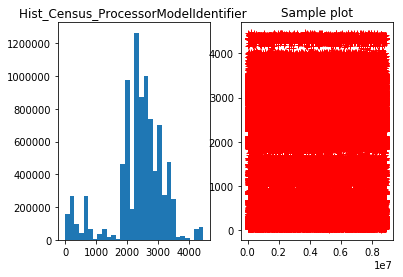

max = 4479.0
min = 2.0


0          2341.0
1          2405.0
2          1972.0
3          2273.0
4          2500.0
5          4324.0
6           657.0
7          3381.0
8          2836.0
9          2373.0
10         4425.0
11         2097.0
12         2407.0
13         3470.0
14         3082.0
15         2373.0
16         1458.0
17         2660.0
18         2665.0
19          212.0
20         3423.0
21         2699.0
22         2660.0
23         2697.0
24         2453.0
25          451.0
26         2267.0
27         2660.0
28         2407.0
29         3079.0
            ...  
8921452    2640.0
8921453    2874.0
8921454    2574.0
8921455    2258.0
8921456    2305.0
8921457    2412.0
8921458    2973.0
8921459    2280.0
8921460    2880.0
8921461      84.0
8921462     642.0
8921463    3427.0
8921464    2883.0
8921465    2865.0
8921466    2302.0
8921467    2660.0
8921468    2412.0
8921469    2259.0
8921470    2393.0
8921471    2660.0
8921472    2569.0
8921473    3478.0
8921475    2840.0
8921476    2998.0
8921477   

In [13]:
#RtpStateBitfield                                     888988 non-null float64 **
#AVProductStatesIdentifier                            888515 non-null float64 **
#AVProductsInstalled                                  888515 non-null float64 **
#AVProductsEnabled                                    888515 non-null float64 **
#IsProtected                                          888537 non-null float64 **
#IeVerIdentifier                                      886421 non-null float64 **
#Firewall                                             883170 non-null float64 **
#UacLuaenable                                         891073 non-null float64 **
#Census_OEMNameIdentifier                             882571 non-null float64 **
#Census_OEMModelIdentifier                            881879 non-null float64 **
#Census_ProcessorCoreCount                            888004 non-null float64 **
#Census_ProcessorManufacturerIdentifier               888002 non-null float64 **
#Census_ProcessorModelIdentifier                      887997 non-null float64 **


number_bins = 30
dropandplot(train_df['RtpStateBitfield'], number_bins, 'RtpStateBitfield ')
dropandplot(train_df['AVProductStatesIdentifier'], number_bins, 'AVProductStatesIdentifier ')
dropandplot(train_df['AVProductsInstalled'], number_bins, 'AVProductsInstalled ')
dropandplot(train_df['AVProductsEnabled'], number_bins, 'AVProductsEnabled ')
dropandplot(train_df['IsProtected'], number_bins, 'IsProtected ')
dropandplot(train_df['IeVerIdentifier'], number_bins, 'IeVerIdentifier  ')
dropandplot(train_df['Firewall'], number_bins, 'Firewall ')
dropandplot(train_df['UacLuaenable'], number_bins, 'UacLuaenable ')
dropandplot(train_df['Census_OEMNameIdentifier'], number_bins, 'Census_OEMNameIdentifier ')
dropandplot(train_df['Census_OEMModelIdentifier'], number_bins, 'Census_OEMModelIdentifier ')
dropandplot(train_df['Census_ProcessorCoreCount'], number_bins, 'Census_ProcessorCoreCount ')
dropandplot(train_df['Census_ProcessorManufacturerIdentifier'], number_bins, 'Census_ProcessorManufacturerIdentifier ')
dropandplot(train_df['Census_ProcessorModelIdentifier'], number_bins, 'Census_ProcessorModelIdentifier ')


In [16]:
def median_clean_EDA(label, number_bins):
    median = np.median(train_df[label].dropna())
    print (median)
    train_clean_df[label] = fillcolumn(train_df[label], median)
    EDAcolumn(train_clean_df[label], 30, label)

In [27]:
# I think this mostly might need to be added a new label
def median_clean_EDAObject(label, number_bins):
    median = np.median(train_df[label].dropna())
    print (median)
    train_clean_df[label] = fillcolumn(train_df[label], median)
    EDAcolumnObject(train_clean_df[label], 30, label)

7.0
Unique values
[ 7.  0.  3.  5.  8.  1. 35.]
Values of n in bins:
(array([1.923260e+05, 0.000000e+00, 3.029000e+03, 0.000000e+00,
       2.032800e+04, 0.000000e+00, 8.705779e+06, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.100000e+01]), array([ 0.        ,  1.16666667,  2.33333333,  3.5       ,  4.66666667,
        5.83333333,  7.        ,  8.16666667,  9.33333333, 10.5       ,
       11.66666667, 12.83333333, 14.        , 15.16666667, 16.33333333,
       17.5       , 18.66666667, 19.83333333, 21.        , 22.16666667,
       23.33333333, 24.5       , 25.66666667, 26.83333333, 28.        ,
       29.16666667, 30.33333333, 31.5       , 32.66666667, 33.83333333,
       35.        ])

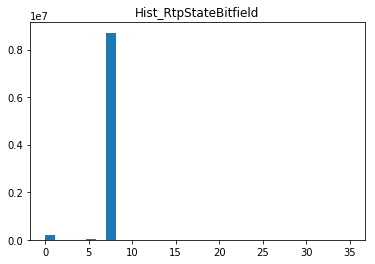

In [19]:
#RtpStateBitfield                                     888988 non-null float64 **
#AVProductStatesIdentifier                            888515 non-null float64 **
#AVProductsInstalled                                  888515 non-null float64 **
#AVProductsEnabled                                    888515 non-null float64 **
#IsProtected                                          888537 non-null float64 **
#IeVerIdentifier                                      886421 non-null float64 **
#Firewall                                             883170 non-null float64 **
#UacLuaenable                                         891073 non-null float64 **
#Census_OEMNameIdentifier                             882571 non-null float64 **
#Census_OEMModelIdentifier                            881879 non-null float64 **
#Census_ProcessorCoreCount                            888004 non-null float64 **
#Census_ProcessorManufacturerIdentifier               888002 non-null float64 **
#Census_ProcessorModelIdentifier                      887997 non-null float64 **

median_clean_EDA('RtpStateBitfield', number_bins)
median_clean_EDA('AVProductStatesIdentifier', number_bins)
median_clean_EDA('AVProductsInstalled', number_bins)
median_clean_EDA('AVProductsEnabled', number_bins)
median_clean_EDA('IsProtected', number_bins)
median_clean_EDA('IeVerIdentifier', number_bins)
median_clean_EDA('Firewall', number_bins)
median_clean_EDA('UacLuaenable', number_bins)
median_clean_EDA('Census_OEMNameIdentifier', number_bins)
median_clean_EDA('Census_OEMModelIdentifier', number_bins)
median_clean_EDA('Census_ProcessorCoreCount', number_bins)
median_clean_EDA('Census_ProcessorManufacturerIdentifier', number_bins)
median_clean_EDA('Census_ProcessorModelIdentifier', number_bins)


Unique values
[ 0. nan  1.]
Size of the vector after dropping Nan (8760960,)
Values of n in bins:
(array([8.760872e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 8.800000e+01]), array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ]), 

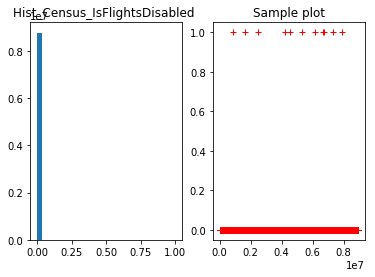

max = 1.0
min = 0.0
Unique values
[ 628.  142.  355.   93.  556.  512.  500.  845.  486.  803.  152.  644.
   nan  897.  168.  554.  559.  677.  444.  134.  127.  513.  691.  798.
  809.  807.  639.  361.  440.  491.  781.  777.  789.  869.  659.  360.
  302.  299.  465.  820.  105.  805.  150.  279.  106.  892.  687.  839.
  529.  827.  298.  190.  831.  653. 1080.  369.  876.  446.  196.  560.
  205.  442.  311.  633.  998.  520.  717. 1075.  658.  819.  901.  347.
 1030. 1079.  830. 1081.  718. 1069.  359.  651.  350.  679.  545.  661.
  696.  821.  991.  538.  107.  708.  902.  182.  310.  422.  664.  338.
   17.  445.  888.  642.  203. 1014.  301.  354.  488.  461. 1040.  699.
  853.  523.  109.  584.  108.  601.  981.  371.  460.  508.  130.  357.
  671.  353.  665.  243.  828.  522.  276.  539.  685.  118.  540. 1018.
  916.  893.  707.   85.  537.  496.  521.  439.  507.  119.  561.  604.
  268.  833.  315. 1083.  806.  215.  669.  437.   34.  999.  423.  434.
   89.  939.  721

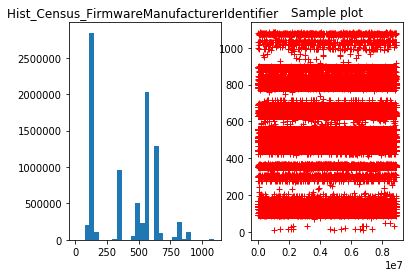

max = 1092.0
min = 2.0
Unique values
[36144. 57858. 52682. ...  3871. 33818. 69704.]
Size of the vector after dropping Nan (8761350,)
Values of n in bins:
(array([  53854.,  477604.,  276126.,  735656.,  354502.,  458199.,
        224008.,  224652.,  713067.,   71854.,  135641.,   79152.,
         45941., 1623524.,  242141.,  132067.,   79510.,  165992.,
        108557.,   72386.,  114552.,  300039.,  109110.,  183436.,
         83278.,  118555.,  914360.,   55110.,  209693.,  398784.]), array([3.00000e+00, 2.40640e+03, 4.80980e+03, 7.21320e+03, 9.61660e+03,
       1.20200e+04, 1.44234e+04, 1.68268e+04, 1.92302e+04, 2.16336e+04,
       2.40370e+04, 2.64404e+04, 2.88438e+04, 3.12472e+04, 3.36506e+04,
       3.60540e+04, 3.84574e+04, 4.08608e+04, 4.32642e+04, 4.56676e+04,
       4.80710e+04, 5.04744e+04, 5.28778e+04, 5.52812e+04, 5.76846e+04,
       6.00880e+04, 6.24914e+04, 6.48948e+04, 6.72982e+04, 6.97016e+04,
       7.21050e+04]), <a list of 30 Patch objects>)


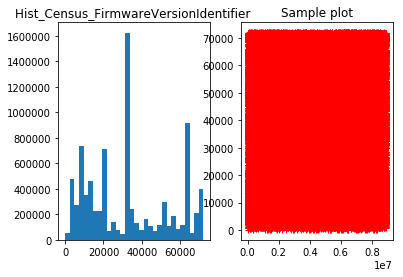

max = 72105.0
min = 3.0


0          36144.0
1          57858.0
2          52682.0
3          20050.0
4          19844.0
5          51039.0
6          63175.0
7          63122.0
8          15510.0
9          63555.0
10         50922.0
11         15816.0
12         51601.0
13         11081.0
14         38347.0
15         19951.0
16         64575.0
17         27266.0
18         45542.0
19          8919.0
20         39482.0
22         48686.0
23         12463.0
24         51032.0
25          3120.0
26         40479.0
27         70432.0
28          2499.0
29         33968.0
30         64640.0
            ...   
8921451    36381.0
8921452    41138.0
8921453    13908.0
8921454     7271.0
8921455    20107.0
8921456    19951.0
8921457    69704.0
8921458    20317.0
8921459    33135.0
8921460    15692.0
8921461    33060.0
8921462    33115.0
8921463    42275.0
8921464    33026.0
8921465    56881.0
8921466    70013.0
8921467    27260.0
8921468    33070.0
8921469    33032.0
8921470     8941.0
8921471    27530.0
8921472    6

In [24]:
#Census_IsFlightsDisabled                             876372 non-null float64 ** --
#Census_FirmwareManufacturerIdentifier                873829 non-null float64 ** --
#Census_FirmwareVersionIdentifier                     876146 non-null float64 ** --

dropandplot(train_df['Census_IsFlightsDisabled'], number_bins, 'Census_IsFlightsDisabled ')
dropandplot(train_df['Census_FirmwareManufacturerIdentifier'], number_bins, 'Census_FirmwareManufacturerIdentifier ')
dropandplot(train_df['Census_FirmwareVersionIdentifier'], number_bins, 'Census_FirmwareVersionIdentifier ')

53447.0
Unique values
[53447. 43927. 46413. ... 16684. 60602. 31745.]


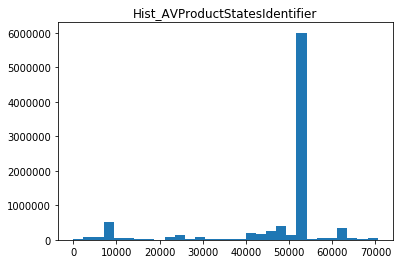

Values of n in bins:
(array([   8751.,   68751.,   75099.,  508377.,   48011.,   41146.,
         12281.,   15562.,    8235.,   80327.,  145597.,   13565.,
         82525.,   17862.,   13044.,   11326.,   18679.,  193805.,
        181721.,  257147.,  390823.,  147678., 6005789.,   36607.,
         43815.,   61447.,  327769.,   38717.,   18861.,   48166.]), array([3.00000000e+00, 2.35313333e+03, 4.70326667e+03, 7.05340000e+03,
       9.40353333e+03, 1.17536667e+04, 1.41038000e+04, 1.64539333e+04,
       1.88040667e+04, 2.11542000e+04, 2.35043333e+04, 2.58544667e+04,
       2.82046000e+04, 3.05547333e+04, 3.29048667e+04, 3.52550000e+04,
       3.76051333e+04, 3.99552667e+04, 4.23054000e+04, 4.46555333e+04,
       4.70056667e+04, 4.93558000e+04, 5.17059333e+04, 5.40560667e+04,
       5.64062000e+04, 5.87563333e+04, 6.11064667e+04, 6.34566000e+04,
       6.58067333e+04, 6.81568667e+04, 7.05070000e+04]), <a list of 30 Patch objects>)
1.0
Unique values
[1. 2. 3. 5. 4. 6. 7. 0.]


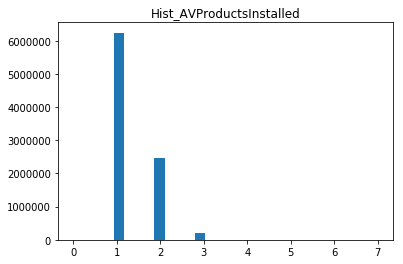

Values of n in bins:
(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       6.245114e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.459008e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.081030e+05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 8.757000e+03, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 4.710000e+02, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.800000e+01, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00]), array([0.        , 0.23333333, 0.46666667, 0.7       , 0.93333333,
       1.16666667, 1.4       , 1.63333333, 1.86666667, 2.1       ,
       2.33333333, 2.56666667, 2.8       , 3.03333333, 3.26666667,
       3.5       , 3.73333333, 3.96666667, 4.2       , 4.43333333,
       4.66666667, 4.9       , 5.13333333, 5.36666667, 5.6       ,
       5.83333333, 6.06666667, 6.3       , 6.53333333, 6.76666667,
       7.        ]), <a list of 30 Patch objects>)
1.0
Unique values
[1. 2. 0. 4. 3. 5.]


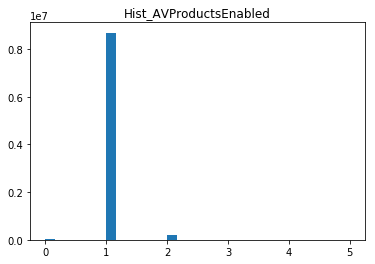

Values of n in bins:
(array([2.595800e+04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 8.690322e+06, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.986520e+05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 6.075000e+03, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       4.530000e+02, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.300000e+01]), array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
       1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
       2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
       3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
       4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
       5.        ]), <a list of 30 Patch objects>)
1.0
Unique values
[1. 0.]


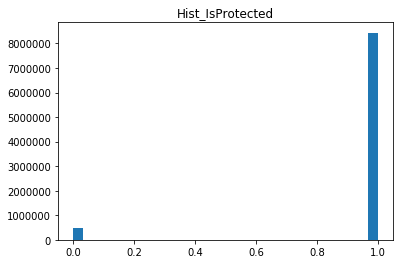

Values of n in bins:
(array([ 483157.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0., 8438326.]), array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ]), <a list of 30 Patch objects>)
117.0
Unique values
[137.  94. 117. 290. 111. 333.  65. 108.  82. 103.  98. 323.  78. 105.
  84. 135.  41.  76.  53. 107.  74. 302.  96.  68. 114. 311.  51.  71.
  81. 335.  42.  46. 308. 

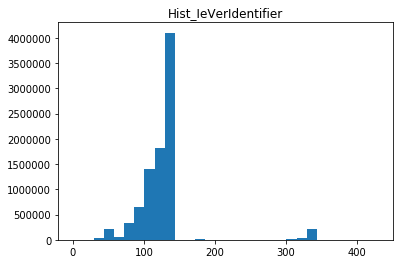

Values of n in bins:
(array([7.200000e+01, 3.600000e+01, 4.295800e+04, 2.164780e+05,
       5.683500e+04, 3.265800e+05, 6.482280e+05, 1.393362e+06,
       1.826829e+06, 4.103397e+06, 1.414000e+03, 4.744000e+03,
       8.127000e+03, 4.157000e+03, 1.329000e+03, 5.000000e+02,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.725000e+03,
       4.222000e+03, 1.445200e+04, 4.293100e+04, 2.211990e+05,
       4.020000e+02, 4.290000e+02, 4.410000e+02, 2.950000e+02,
       4.500000e+01, 2.960000e+02]), array([  1.        ,  15.26666667,  29.53333333,  43.8       ,
        58.06666667,  72.33333333,  86.6       , 100.86666667,
       115.13333333, 129.4       , 143.66666667, 157.93333333,
       172.2       , 186.46666667, 200.73333333, 215.        ,
       229.26666667, 243.53333333, 257.8       , 272.06666667,
       286.33333333, 300.6       , 314.86666667, 329.13333333,
       343.4       , 357.66666667, 371.93333333, 386.2       ,
       400.46666667, 414.73333333, 429.        ]), <a list 

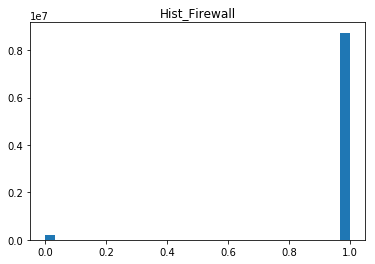

Values of n in bins:
(array([ 189119.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0., 8732364.]), array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ]), <a list of 30 Patch objects>)
1.0
Unique values
[1.0000000e+00 0.0000000e+00 4.8000000e+01 3.0000000e+00 2.0000000e+00
 6.3570620e+06 4.9000000e+01 1.6777216e+07 5.0000000e+00 2.5500000e+02
 7.7988840e+06]


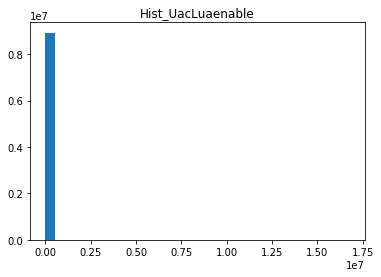

Values of n in bins:
(array([8.921468e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.300000e+01,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00]), array([       0.        ,   559240.53333333,  1118481.06666667,
        1677721.6       ,  2236962.13333333,  2796202.66666667,
        3355443.2       ,  3914683.73333333,  4473924.26666667,
        5033164.8       ,  5592405.33333333,  6151645.86666667,
        6710886.4       ,  7270126.93333333,  7829367.46666667,
        8388608.        ,  8947848.53333333,  9507089.06666667,
       10066329.6       , 10625570.13333333, 11184810.66666667,
       11744051.2       , 12303291.73333333, 1286253

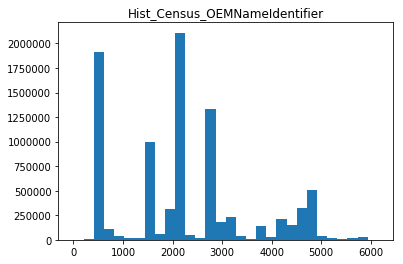

Values of n in bins:
(array([1.688000e+03, 9.034000e+03, 1.916918e+06, 1.063830e+05,
       3.684400e+04, 1.360000e+04, 1.881300e+04, 9.948900e+05,
       6.028800e+04, 3.149120e+05, 2.109314e+06, 5.286500e+04,
       1.424600e+04, 1.335156e+06, 1.841660e+05, 2.345820e+05,
       4.005700e+04, 9.910000e+03, 1.401930e+05, 3.043400e+04,
       2.096980e+05, 1.491460e+05, 3.255600e+05, 5.071330e+05,
       4.087800e+04, 1.326900e+04, 8.695000e+03, 1.442300e+04,
       2.671000e+04, 1.678000e+03]), array([1.0000e+00, 2.0580e+02, 4.1060e+02, 6.1540e+02, 8.2020e+02,
       1.0250e+03, 1.2298e+03, 1.4346e+03, 1.6394e+03, 1.8442e+03,
       2.0490e+03, 2.2538e+03, 2.4586e+03, 2.6634e+03, 2.8682e+03,
       3.0730e+03, 3.2778e+03, 3.4826e+03, 3.6874e+03, 3.8922e+03,
       4.0970e+03, 4.3018e+03, 4.5066e+03, 4.7114e+03, 4.9162e+03,
       5.1210e+03, 5.3258e+03, 5.5306e+03, 5.7354e+03, 5.9402e+03,
       6.1450e+03]), <a list of 30 Patch objects>)
247458.0
Unique values
[  9124.  91656. 317701.

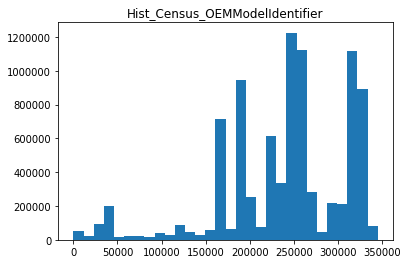

Values of n in bins:
(array([  49441.,   24545.,   95501.,  197154.,   16907.,   21055.,
         24038.,   17919.,   37424.,   30411.,   85645.,   48990.,
         26185.,   55703.,  716249.,   63665.,  944839.,  253465.,
         77602.,  614740.,  333997., 1224580., 1122749.,  283100.,
         44912.,  215132.,  211358., 1115392.,  889063.,   79722.]), array([1.00000000e+00, 1.15175667e+04, 2.30341333e+04, 3.45507000e+04,
       4.60672667e+04, 5.75838333e+04, 6.91004000e+04, 8.06169667e+04,
       9.21335333e+04, 1.03650100e+05, 1.15166667e+05, 1.26683233e+05,
       1.38199800e+05, 1.49716367e+05, 1.61232933e+05, 1.72749500e+05,
       1.84266067e+05, 1.95782633e+05, 2.07299200e+05, 2.18815767e+05,
       2.30332333e+05, 2.41848900e+05, 2.53365467e+05, 2.64882033e+05,
       2.76398600e+05, 2.87915167e+05, 2.99431733e+05, 3.10948300e+05,
       3.22464867e+05, 3.33981433e+05, 3.45498000e+05]), <a list of 30 Patch objects>)
4.0
Unique values
[  4.   2.   8.  12.   1.   6.  16.   3

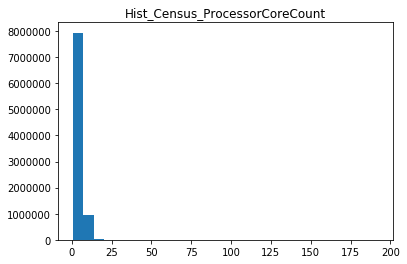

Values of n in bins:
(array([7.937656e+06, 9.578160e+05, 2.036100e+04, 1.854000e+03,
       2.417000e+03, 2.870000e+02, 5.220000e+02, 2.390000e+02,
       1.360000e+02, 9.300000e+01, 0.000000e+00, 3.900000e+01,
       2.000000e+01, 2.300000e+01, 6.000000e+00, 0.000000e+00,
       2.000000e+00, 6.000000e+00, 1.000000e+00, 3.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00]), array([  1.        ,   7.36666667,  13.73333333,  20.1       ,
        26.46666667,  32.83333333,  39.2       ,  45.56666667,
        51.93333333,  58.3       ,  64.66666667,  71.03333333,
        77.4       ,  83.76666667,  90.13333333,  96.5       ,
       102.86666667, 109.23333333, 115.6       , 121.96666667,
       128.33333333, 134.7       , 141.06666667, 147.43333333,
       153.8       , 160.16666667, 166.53333333, 172.9       ,
       179.26666667, 185.63333333, 192.        ]), <a list 

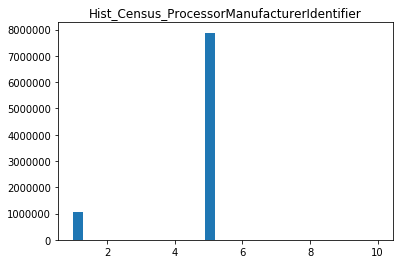

Values of n in bins:
(array([1.040292e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 2.180000e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 7.880631e+06, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 3.390000e+02]), array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
        4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
        7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]), <a list of 30 Patch objects>)
2500.0
Unique values
[2341. 2405. 1972. ... 1728.  277. 4265.]


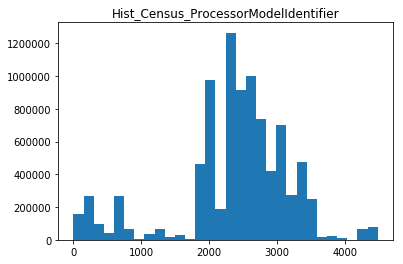

Values of n in bins:
(array([1.593400e+05, 2.699670e+05, 9.913900e+04, 4.392000e+04,
       2.680730e+05, 6.648000e+04, 6.227000e+03, 3.642200e+04,
       6.629500e+04, 1.865600e+04, 2.813100e+04, 2.112000e+03,
       4.630540e+05, 9.782240e+05, 1.891910e+05, 1.265534e+06,
       9.163470e+05, 9.983440e+05, 7.386140e+05, 4.189490e+05,
       7.034420e+05, 2.730030e+05, 4.756540e+05, 2.466890e+05,
       1.499100e+04, 2.140300e+04, 1.083800e+04, 8.120000e+02,
       6.315400e+04, 7.847800e+04]), array([2.00000000e+00, 1.51233333e+02, 3.00466667e+02, 4.49700000e+02,
       5.98933333e+02, 7.48166667e+02, 8.97400000e+02, 1.04663333e+03,
       1.19586667e+03, 1.34510000e+03, 1.49433333e+03, 1.64356667e+03,
       1.79280000e+03, 1.94203333e+03, 2.09126667e+03, 2.24050000e+03,
       2.38973333e+03, 2.53896667e+03, 2.68820000e+03, 2.83743333e+03,
       2.98666667e+03, 3.13590000e+03, 3.28513333e+03, 3.43436667e+03,
       3.58360000e+03, 3.73283333e+03, 3.88206667e+03, 4.03130000e+03,
   

In [23]:
median_clean_EDA('AVProductStatesIdentifier', number_bins)
median_clean_EDA('AVProductsInstalled', number_bins)
median_clean_EDA('AVProductsEnabled', number_bins)
median_clean_EDA('IsProtected', number_bins)
median_clean_EDA('IeVerIdentifier', number_bins)
median_clean_EDA('Firewall', number_bins)
median_clean_EDA('UacLuaenable', number_bins)
median_clean_EDA('Census_OEMNameIdentifier', number_bins)
median_clean_EDA('Census_OEMModelIdentifier', number_bins)
median_clean_EDA('Census_ProcessorCoreCount', number_bins)
median_clean_EDA('Census_ProcessorManufacturerIdentifier', number_bins)
median_clean_EDA('Census_ProcessorModelIdentifier', number_bins)


0.0
Unique values
[0. 1.]


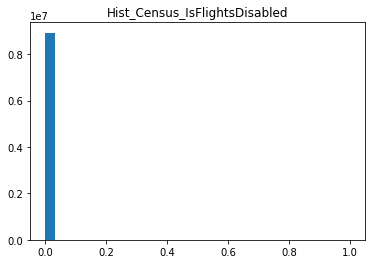

Values of n in bins:
(array([8.921395e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 8.800000e+01]), array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ]), <a list of 30 Patch objects>)
500.0
Unique values
[ 628.  142.  355.   93.  5

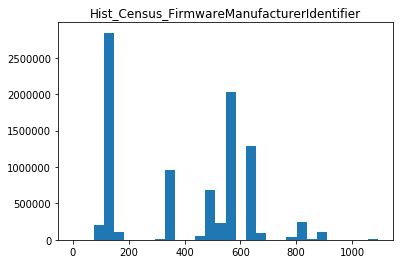

Values of n in bins:
(array([2.020000e+02, 7.000000e+01, 2.084600e+05, 2.843306e+06,
       1.052960e+05, 1.426000e+03, 8.600000e+01, 1.033000e+03,
       7.741000e+03, 9.529240e+05, 1.339000e+03, 7.790000e+02,
       5.662800e+04, 6.817410e+05, 2.366640e+05, 2.024726e+06,
       5.630000e+02, 1.287105e+06, 9.737800e+04, 1.131000e+03,
       1.230000e+02, 3.453000e+04, 2.474220e+05, 7.179000e+03,
       1.124420e+05, 1.650000e+02, 1.450000e+02, 1.637000e+03,
       3.008000e+03, 6.234000e+03]), array([   2.        ,   38.33333333,   74.66666667,  111.        ,
        147.33333333,  183.66666667,  220.        ,  256.33333333,
        292.66666667,  329.        ,  365.33333333,  401.66666667,
        438.        ,  474.33333333,  510.66666667,  547.        ,
        583.33333333,  619.66666667,  656.        ,  692.33333333,
        728.66666667,  765.        ,  801.33333333,  837.66666667,
        874.        ,  910.33333333,  946.66666667,  983.        ,
       1019.33333333, 1055.6666

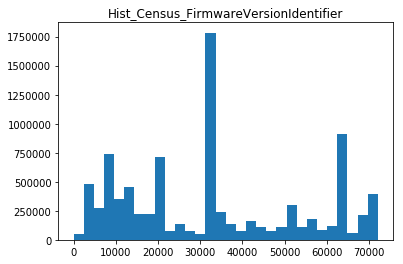

Values of n in bins:
(array([  53854.,  477604.,  276126.,  735656.,  354502.,  458199.,
        224008.,  224652.,  713067.,   71854.,  135641.,   79152.,
         45941., 1783657.,  242141.,  132067.,   79510.,  165992.,
        108557.,   72386.,  114552.,  300039.,  109110.,  183436.,
         83278.,  118555.,  914360.,   55110.,  209693.,  398784.]), array([3.00000e+00, 2.40640e+03, 4.80980e+03, 7.21320e+03, 9.61660e+03,
       1.20200e+04, 1.44234e+04, 1.68268e+04, 1.92302e+04, 2.16336e+04,
       2.40370e+04, 2.64404e+04, 2.88438e+04, 3.12472e+04, 3.36506e+04,
       3.60540e+04, 3.84574e+04, 4.08608e+04, 4.32642e+04, 4.56676e+04,
       4.80710e+04, 5.04744e+04, 5.28778e+04, 5.52812e+04, 5.76846e+04,
       6.00880e+04, 6.24914e+04, 6.48948e+04, 6.72982e+04, 6.97016e+04,
       7.21050e+04]), <a list of 30 Patch objects>)


In [25]:
#Census_IsFlightsDisabled                             876372 non-null float64 ** --
#Census_FirmwareManufacturerIdentifier                873829 non-null float64 ** --
#Census_FirmwareVersionIdentifier                     876146 non-null float64 ** --
median_clean_EDA('Census_IsFlightsDisabled', number_bins)
median_clean_EDA('Census_FirmwareManufacturerIdentifier', number_bins)
median_clean_EDA('Census_FirmwareVersionIdentifier', number_bins)

Unique values
['HDD' 'SSD' 'UNKNOWN' 'Unspecified' nan]
Size of the vector after dropping Nan (8908639,)
Count values
HDD            5806804
SSD            2466808
UNKNOWN         358251
Unspecified     276776
Name: Census_PrimaryDiskTypeName, dtype: int64


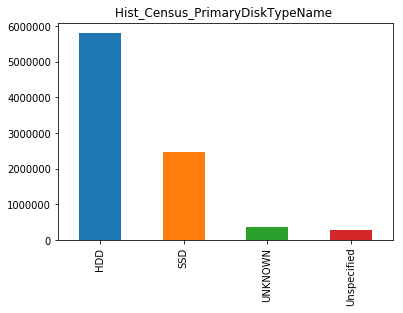

max = Unspecified
min = HDD
Unique values
['Desktop' 'Notebook' 'MiniTower' 'Portable' 'Detachable' 'Laptop'
 'AllinOne' 'LowProfileDesktop' 'SpaceSaving' 'Other' 'Unknown' 'HandHeld'
 'UNKNOWN' 'Convertible' 'Tower' 'MainServerChassis' 'LunchBox'
 'SubNotebook' 'MiniPC' 'RackMountChassis' 'Tablet' '30' 'StickPC'
 'BusExpansionChassis' nan '36' '82' '35' '0' 'Blade' 'IoTGateway'
 'MultisystemChassis' 'SealedCasePC' '32' '31' 'ExpansionChassis'
 'SubChassis' 'PizzaBox' '88' '25' '28' '44' '127' '76' 'DockingStation'
 '45' '49' 'CompactPCI' '112' 'BladeEnclosure' '81' 'EmbeddedPC' '39']
Size of the vector after dropping Nan (8920860,)
Count values
Notebook               5248812
Desktop                1872125
Laptop                  685581
Portable                360903
AllinOne                204295
MiniTower                85127
Convertible              84472
Other                    75782
UNKNOWN                  67212
Detachable               51466
LowProfileDesktop        50072
HandH

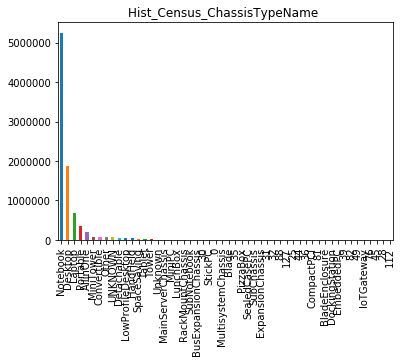

max = Unknown
min = 0
Unique values
['Desktop' 'Mobile' 'Slate' 'Workstation' 'SOHOServer' 'UNKNOWN'
 'AppliancePC' 'EnterpriseServer' 'PerformanceServer' nan 'Unspecified']
Size of the vector after dropping Nan (8921428,)
Count values
Mobile               6182908
Desktop              2066620
Slate                 492537
Workstation           109683
SOHOServer             37841
UNKNOWN                20628
EnterpriseServer        7094
AppliancePC             4015
PerformanceServer         97
Unspecified                5
Name: Census_PowerPlatformRoleName, dtype: int64


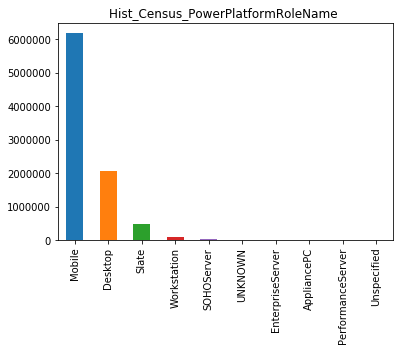

max = Workstation
min = AppliancePC


In [31]:
#Census_PrimaryDiskTypeName                           890860 non-null object **
#Census_ChassisTypeName                               892083 non-null object **
#Census_PowerPlatformRoleName                         892140 non-null object **


dropandplotObject(train_df['Census_PrimaryDiskTypeName'],'Census_PrimaryDiskTypeName ')
dropandplotObject(train_df['Census_ChassisTypeName'],'Census_ChassisTypeName ')
dropandplotObject(train_df['Census_PowerPlatformRoleName'],'Census_PowerPlatformRoleName ')

In [32]:
number_bins = 30
median_clean_EDAObject('Census_PrimaryDiskTypeName', number_bins)
median_clean_EDAObject('Census_ChassisTypeName', number_bins)
median_clean_EDAObject('Census_PowerPlatformRoleName', number_bins)

TypeError: unsupported operand type(s) for /: 'str' and 'int'